In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import os

In [26]:
RAW_DATA_PATH = "../data/raw/faculty_data.csv"
PROCESSED_DATA_PATH = "../data/processed/cleaned_faculty_data.csv"

# Check if file exists
if not os.path.exists(RAW_DATA_PATH):
    print(f"Error: File not found at {RAW_DATA_PATH}")
else:
    # Load the dataset
    df = pd.read_csv(RAW_DATA_PATH)

    # Replace "N/A" strings with actual NumPy NaN for proper analysis
    df.replace(["N/A", "n/a", ""], np.nan, inplace=True)

    # Display first few rows
    print(f"Total Records: {len(df)}")
    display(df.head())

Total Records: 109


,University,Name,Type,Education,Contact_Number,Email_ID,Address,Hyperlink,Profile_URL,Specializations,Publications,Teaching,Research,Biography
0,DA-IICT,Yash Vasavada,Regular Faculty,"PhD (Electrical Engineering), Virginia Polytec...",079-68261634,yash_vasavada@dau.ac.in,"# 1224, FB-1, DA-IICT, Gandhinagar, Gujarat, I...",http://intranet.daiict.ac.in/~yash_vasavada/in...,https://www.daiict.ac.in/faculty/yash-vasavada,"Communication, Signal Processing, Machine Lear...","Selected Publications Yash Vasavada, Michael P...",Introduction to Communication Systems Advanced...,NaN,Yash Vasavada is currently a Professor at DAII...
1,DA-IICT,Yash Agrawal,Regular Faculty,"PhD (Electronics & Communication), NIT Hamirpur","079-68261629, 9882114669",yash_agrawal@dau.ac.in,"# 1101, FB-1, DA-IICT, Gandhinagar, Gujarat, I...",http://www.linkedin.com/in/yash-agrawal-525b021a/,https://www.daiict.ac.in/faculty/yash-agrawal,"VLSI, Nanotechnology, Numerical Method Techniq...","Y. Agrawal, M. Girish, and R. Chandel, “An eff...",Digital Logic Design Digital Design using HDL ...,NaN,Dr. Yash Agrawal received his Ph.D. and M.Tech...
2,DA-IICT,Vinay Palaparthy,Regular Faculty,"PhD (Electrical Engineering), IIT Bombay",079-68261677,vinay_shrinivas@dau.ac.in,"# 1208, FB-1, DA-IICT, Gandhinagar, Gujarat, I...",http://www.facebook.com/share.php?u=https://ww...,https://www.daiict.ac.in/faculty/vinay-palaparthy,"Micro-Electro-Mechanical Systems (MEMS), Physi...","Journals: G. Bhatti, Y. Agrawal, V. S. Palapar...",Introduction to MEMS Sensors and Instrumentati...,NaN,Vinay Palaparthy is working as the associate p...
3,DA-IICT,Tathagata Bandyopadhyay,Regular Faculty,"PhD (Statistics), University of Calcutta, Kolkata",079-68261572,tathagata_b@dau.ac.in,NaN,http://www.facebook.com/share.php?u=https://ww...,https://www.daiict.ac.in/faculty/tathagata-ban...,"Statistical Inference, Survey Sampling, Discre...",Publications: Book: Confidence Intervals for D...,Research Methodology Data Analytics Bayesian D...,NaN,Dr. Tathagata Bandyopadhyay has been in the ac...
4,DA-IICT,Tapas Kumar Maiti,Regular Faculty,PhD (Electronics & Telecommunication Engineeri...,079-68261637,tapas_kumar@dau.ac.in,"# 2206, FB-2, DA-IICT, Gandhinagar, Gujarat, I...",https://sites.google.com/view/cybernoid,https://www.daiict.ac.in/faculty/tapas-kumar-m...,Meet Dr. Tapas Kumar Maiti: Pioneering Researc...,"Selected Journal Publications T. K. Maiti, S. ...",IE416: Robot Programming (Winter 2024) IE410: ...,"Current PhD Student Subhadeep Paul, Area: Inte...","Dr. Tapas Kumar Maiti, a former associate prof..."


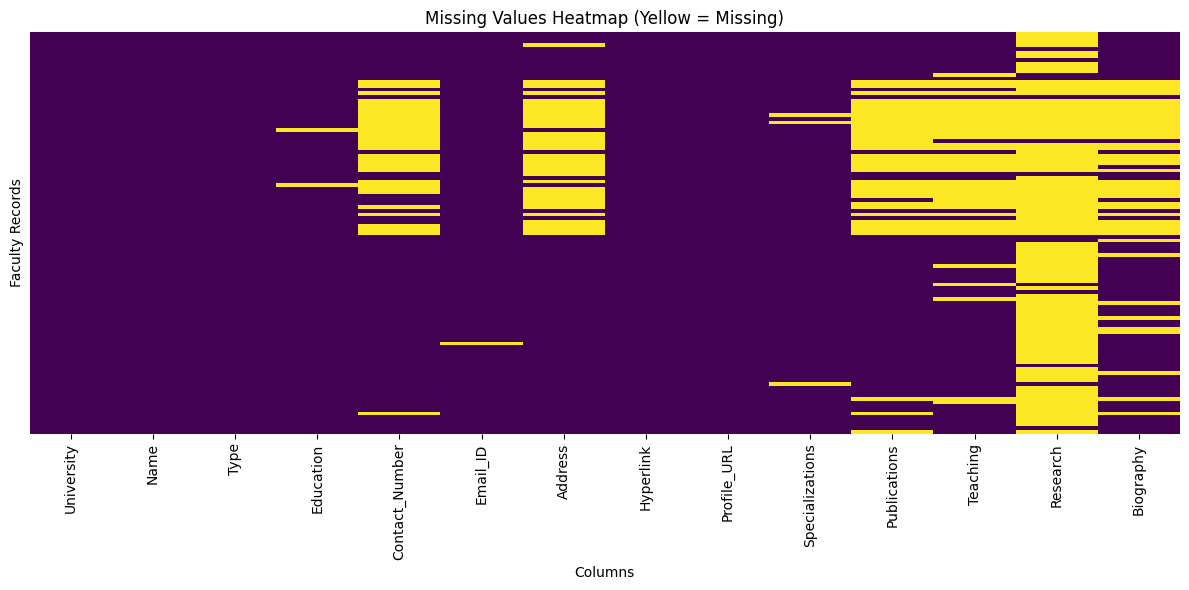

Percentage of Missing Data per Column:
Research           87.155963
Biography          38.532110
Teaching           36.697248
Publications       33.944954
Address            32.110092
Contact_Number     29.357798
Specializations     2.752294
Education           1.834862
Email_ID            0.917431
dtype: float64


In [27]:
if "df" in locals():
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
    plt.title("Missing Values Heatmap (Yellow = Missing)")
    plt.xlabel("Columns")
    plt.ylabel("Faculty Records")
    plt.tight_layout()
    plt.show()

    # Calculate percentage of missing data per column
    missing_percent = df.isnull().sum() * 100 / len(df)
    print("Percentage of Missing Data per Column:")
    print(missing_percent[missing_percent > 0].sort_values(ascending=False))

In [28]:
if "df" in locals():
    print("\n--- Detailed Missing Value Report ---\n")

    # Filter for rows that have at least one missing value in key columns
    key_columns = ["Email_ID", "Specializations", "Biography", "Education"]
    # Check if these columns exist in the dataframe before filtering
    existing_keys = [c for c in key_columns if c in df.columns]

    missing_rows = df[df[existing_keys].isnull().any(axis=1)]

    for index, row in missing_rows.iterrows():
        # Identify which specific columns are null for this person
        missing_cols = [col for col in df.columns if pd.isna(row[col])]

        # Print in format: Name -> [List of Missing Columns]
        if missing_cols:
            print(f"{row.get('Name', 'Unknown')}: Missing {missing_cols}")


--- Detailed Missing Value Report ---

Umang Shah: Missing ['Contact_Number', 'Address', 'Publications', 'Teaching', 'Research', 'Biography']
Thomas Mandl: Missing ['Contact_Number', 'Address', 'Publications', 'Teaching', 'Research', 'Biography']
Vishvajit Pandya: Missing ['Research', 'Biography']
K C Supekar: Missing ['Contact_Number', 'Address', 'Publications', 'Teaching', 'Research', 'Biography']
Anirban Dutta Gupta: Missing ['Contact_Number', 'Address', 'Publications', 'Teaching', 'Research', 'Biography']
Ajay Tomar: Missing ['Contact_Number', 'Address', 'Publications', 'Teaching', 'Research', 'Biography']
Stefano Mizzaro: Missing ['Contact_Number', 'Address', 'Publications', 'Teaching', 'Research', 'Biography']
S. Lakshmivarahan: Missing ['Contact_Number', 'Address', 'Publications', 'Teaching', 'Research', 'Biography']
Rita Chakravarti: Missing ['Contact_Number', 'Address', 'Specializations', 'Publications', 'Teaching', 'Research', 'Biography']
Ranjan Pal: Missing ['Contact_Numbe

In [29]:
def clean_and_split_text(text):
    if pd.isna(text):
        return "N/A"

    # 1. Remove extra whitespace/newlines first
    text = re.sub(r"\s+", " ", str(text)).strip()

    # 2. Split into sentences (handling standard punctuation)
    # This regex splits by '. ' but keeps the period.
    sentences = re.split(r"(?<=[.!?]) +", text)

    # 3. Join with a newline character for structure
    return "\n".join(sentences)


if "df" in locals():
    # Apply the function to text-heavy columns if they exist
    text_cols = ["Biography", "Publications", "Research", "Teaching"]

    for col in text_cols:
        if col in df.columns:
            new_col_name = f"{col}_Clean"
            df[new_col_name] = df[col].apply(clean_and_split_text)

    # Preview the transformation
    if "Biography" in df.columns:
        print("Original Bio:", str(df["Biography"].iloc[0])[:100])
        print("\nCleaned Bio:\n", str(df["Biography_Clean"].iloc[0])[:150])

Original Bio: Yash Vasavada is currently a Professor at DAIICT, and he works in the areas of communication system 

Cleaned Bio:
 Yash Vasavada is currently a Professor at DAIICT, and he works in the areas of communication system design and development and application of machine 


In [30]:
if "df" in locals():
    # Ensure the output directory exists
    os.makedirs(os.path.dirname(PROCESSED_DATA_PATH), exist_ok=True)

    # Select and reorder final columns
    desired_columns = [
        "Name",
        "University",
        "Type",
        "Designation",
        "Email_ID",
        "Contact_Number",
        "Address",
        "Hyperlink",
        "Profile_URL",
        "Education",
        "Specializations",
        "Biography_Clean",
        "Publications_Clean",
        "Research_Clean",
        "Teaching_Clean",
    ]

    # Ensure columns exist before selecting (handle optional columns)
    cols_to_export = [c for c in desired_columns if c in df.columns]

    # Save to CSV
    df[cols_to_export].to_csv(PROCESSED_DATA_PATH, index=False)

    print(
        f"\nSuccessfully saved cleaned data to '{PROCESSED_DATA_PATH}' with {len(df)} records."
    )


Successfully saved cleaned data to '../data/processed/cleaned_faculty_data.csv' with 109 records.
